In [3]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [1]:
class Value:

    def __init__(self, data, _children = (), op = "", label ="") -> None:
        self.data = data
        self._prev = set(_children)
        self._op = op
        self.grad = 1
        self.label = label
        self._backward = None

    def __add__(self, other):
        if not isinstance(other, Value):
            other = Value(other)
            def backward(self, other):
                self.grad = 
                self._prev[1].grad = self.grad

            self._backward = backward

        return Value(self.data + other.data, (self,other), "+")
    
    def __sub__(self, other):
        if type(other) != type(Value):
            other = Value(other)
        return Value(self.data - other.data, (self,other), "-")
    
    def __mul__(self, other):
        if not isinstance(other, Value):
            other = Value(other)
        return Value(self.data * other.data, (self,other), "*")
    
    def __div__(self, other):
        if type(other) != type(Value):
            other = Value(other)
        return Value(self.data/other.data, (self,other), "/")
    
    def __pow__(self):
        return Value(self.data**2, (self,),"pow")
    
    def log(self):
        return Value(Math.log(self.data))
    
    def backward(self):
        for children in self._prev:
            children._backward()

    
    def __repr__(self) -> str:
        return f"Value(data={self.data})"
        

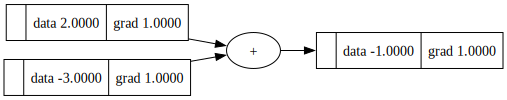

In [7]:
a = Value(-3)
b = Value(2)
c = Value(10)
d =  a + b

draw_dot(d)


In [8]:
d.backward()

TypeError: 'NoneType' object is not callable

In [ ]:
draw_dot(d)
